In [1]:
#Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data
df_cur = pd.read_excel(r"Inventory Dataset.xlsx")
df_new = pd.read_excel(r"New Inventory.xlsx")

In [3]:
df_cur.head()

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399


In [4]:
df_new.head()

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000


In [5]:
#select lowest and highest date
lowest_date = min(df_cur['Date'].dt.date)
highest_date = max(df_new['Inventory Receive'].dt.date)

In [6]:
#selet weekly date range
weekly = pd.date_range(lowest_date, highest_date,freq='W-SAT')

In [7]:
#select monthly date range
monthly = pd.date_range(lowest_date, highest_date,freq='M')

In [8]:
#process the data in pivote table
def process_data(range_type, df_cur, df_new):
    Item_Number = [df_cur['Item Number'][0]]*len(range_type)
    units = [df_cur['Inventory'][0]]*len(range_type)

    data = {
        'Item_Number' : Item_Number,
        'Inventory':units,
        'date':range_type
    }
    df_custom = pd.DataFrame(data)
    cur_count = units[0]
    cur_pointer = 0
    for j in range(len(df_new)):
        if df_new['Item Number'][j] == Item_Number[0]:
            while cur_pointer < len(Item_Number):
                if df_new['Inventory Receive'][j] <= df_custom['date'][cur_pointer]:
                    cur_count+=df_new['Total Item Qty'][j]    
                    df_custom['Inventory'][cur_pointer] = cur_count
                    cur_pointer+=1
                    break
                df_custom['Inventory'][cur_pointer] = cur_count
                cur_pointer+=1
    while cur_pointer < len(Item_Number):
        df_custom['Inventory'][cur_pointer] = cur_count
        cur_pointer+=1

    df_fin = pd.pivot_table(df_custom, columns= "date",index='Item_Number').reset_index()


    for i in range(1,len(df_cur)):
        Item_Number = [df_cur['Item Number'][i]]*len(range_type)
        units = [df_cur['Inventory'][i]]*len(range_type)

        data = {
            'Item_Number' : Item_Number,
            'Inventory':units,
            'date':range_type
        }
        df_custom = pd.DataFrame(data)
        cur_count = units[0]
        cur_pointer = 0
        for j in range(len(df_new)):
            if df_new['Item Number'][j] == Item_Number[0]:
                while cur_pointer < len(Item_Number):
                    if df_new['Inventory Receive'][j] <= df_custom['date'][cur_pointer]:
                        cur_count+=df_new['Total Item Qty'][j]    
                        df_custom['Inventory'][cur_pointer] = cur_count
                        cur_pointer+=1
                        break
                    df_custom['Inventory'][cur_pointer] = cur_count
                    cur_pointer+=1
        while cur_pointer < len(Item_Number):
            df_custom['Inventory'][cur_pointer] = cur_count
            cur_pointer+=1
        df_temp = pd.pivot_table(df_custom, columns= "date",index='Item_Number').reset_index()
        df_fin = pd.concat([df_fin, df_temp], ignore_index = True)
    return df_fin

In [9]:
#call weekly function
df_fin_weekly = process_data(weekly, df_cur, df_new)

In [10]:
#show the weekliy data
df_fin_weekly

Item_Number  Inventory                                              \
date          NaT 2023-06-17 2023-06-24 2023-07-01 2023-07-08 2023-07-15   
0     064-01-1347       3561       3561       3561       3561       5561   
1     064-01-1361       4035       4035       4035       4035       6035   
2     064-01-1375       2684       2684       2684       4264       6032   
3     064-01-1385       5136       5136       5136       5136       7136   
4     064-01-1399       6399       6399       6399       6399       8799   
..            ...        ...        ...        ...        ...        ...   
351   064-18-9909         12         12         12         12         12   
352   064-18-9962         19         19         19         19         19   
353   064-18-0790          5          5          5          5          5   
354   064-18-3316       7354       7354       7354       7354       7354   
355   064-18-9667       7029       7029       7029       7029       7029   

                                                  ...                        \
date 2023-07-22 2023-07-29 2023-08-05 2023-08-12  ... 2023-10-07 2023-10-14   
0          6561      10129      11929      11929  ...      11929      11929   
1          6659      11279      13479      13479  ...      13479      13479   
2          6032       6032       6032       6032  ...       9432       9432   
3          7832      11028      13228      13228  ...      13228      13228   
4          9699      15435      17435      17435  ...      17435      17435   
..          ...        ...        ...        ...  ...        ...        ...   
351          12         12         12         12  ...         12         12   
352          19         19         19         19  ...         19         19   
353           5          5          5          5  ...          5          5   
354        7354       7354       7354       7354  ...       7854       9234   
355        7029       7029       7029       7029  ...       7029       8021   

                                                                        \
date 2023-10-21 2023-10-28 2023-11-04 2023-11-11 2023-11-18 2023-11-25   
0         11929      11929      11929      11929      11929      11929   
1         13479      13479      13479      13479      13479      13479   
2          9432       9432       9432       9432       9432       9432   
3         13228      13228      13228      13228      13228      13228   
4         17435      17435      17435      17435      17435      17435   
..          ...        ...        ...        ...        ...        ...   
351          12         12         12         12         12         12   
352          19         19         19         19         19         19   
353           5          5          5          5          5          5   
354       10614      11114      11114      11114      11114      11114   
355        9013       9013       9013       9013       9013       9013   

                            
date 2023-12-02 2023-12-09  
0         11929      11929  
1         13479      13479  
2          9432       9432  
3         13228      13228  
4         17435      17435  
..          ...        ...  
351          12         12  
352          19         19  
353           5          5  
354       11114      11114  
355        9013       9013  

[356 rows x 27 columns]

In [11]:
#call monthly function 
df_fin_monthly = process_data(monthly, df_cur, df_new)

In [12]:
df_fin_monthly.head()

Item_Number  Inventory                                              \
date          NaT 2023-06-30 2023-07-31 2023-08-31 2023-09-30 2023-10-31   
0     064-01-1347       3561       5561       6561      10129      11929   
1     064-01-1361       4035       6035       6659      11279      13479   
2     064-01-1375       2684       4264       6032       9432       9432   
3     064-01-1385       5136       7136       7832      11028      13228   
4     064-01-1399       6399       8799       9699      15435      17435   

                 
date 2023-11-30  
0         11929  
1         13479  
2          9432  
3         13228  
4         17435

In [13]:
df_fin_monthly.drop(['Item_Number'],axis=1,inplace=True)

In [14]:
sum_per_date = df_fin_monthly.sum(axis=0)
sum_per_date.index = pd.to_datetime(sum_per_date.index.get_level_values('date'))
print(sum_per_date)

date
2023-06-30    1388034
2023-07-31    1560792
2023-08-31    1834572
2023-09-30    2112448
2023-10-31    2365284
2023-11-30    2563456
dtype: int64


In [15]:
df = pd.DataFrame(sum_per_date, columns=['Sum_of_Inventory'])
df = sum_per_date.reset_index()
df.columns = ['Date', 'Inventory']

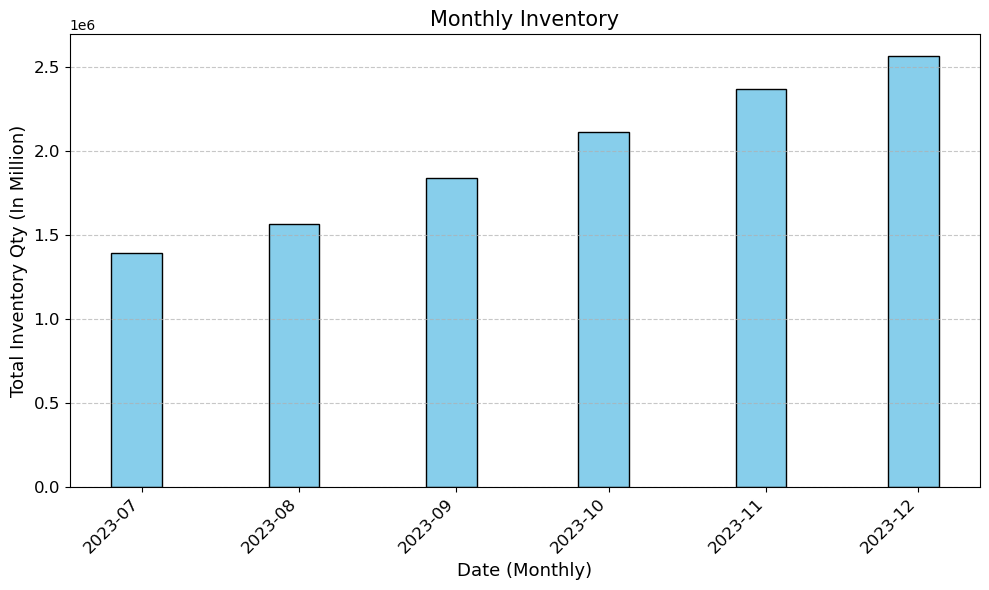

In [16]:
#plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Inventory'],color='skyblue', edgecolor='black', width=10)
plt.xlabel('Date (Monthly)', fontsize=13)
plt.ylabel('Total Inventory Qty (In Million)', fontsize=13)
plt.title('Monthly Inventory', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()